In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
import scipy.stats
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [3]:
from IPython.display import HTML, display
import tabulate

# K-means clustering

#### Import data

In [4]:
df_z = pd.read_parquet('../data/pre_processed/covid_cases_z_trans.parquet')

In [5]:
countries_z = []
for col in df_z.columns:
    countries_z.append(col)

Use scikit-learn's function for Kmeans with k=4 given from the Elbow method

In [6]:
kmeans_z = KMeans(n_clusters=4, random_state=42, init='k-means++', n_init=100, algorithm='auto').fit(df_z.T)

In [7]:
labels_kmeans_z = kmeans_z.labels_[:]
labels_kmeans_z

array([1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 3, 2, 3, 0, 1, 1, 0, 1, 0,
       0, 2, 3, 3, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 3, 1, 3, 1,
       3, 1, 0, 2, 0, 2, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 2, 2, 3, 3, 1, 3,
       2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 2, 2, 1, 1, 1], dtype=int32)

In [8]:
print("K-means:")
print("Countries in cluster 0:", np.count_nonzero(labels_kmeans_z == 0))
print("Countries in cluster 1:", np.count_nonzero(labels_kmeans_z == 1))
print("Countries in cluster 2:", np.count_nonzero(labels_kmeans_z == 2))
print("Countries in cluster 3:", np.count_nonzero(labels_kmeans_z == 3))

K-means:
Countries in cluster 0: 17
Countries in cluster 1: 30
Countries in cluster 2: 22
Countries in cluster 3: 12


In [9]:
#Make a new data frame for each cluster
df_kmeans_z_0 = df_z.T.loc[labels_kmeans_z== 0].transpose()
df_kmeans_z_1 = df_z.T.loc[labels_kmeans_z == 1].transpose()
df_kmeans_z_2 = df_z.T.loc[labels_kmeans_z == 2].transpose()
df_kmeans_z_3 = df_z.T.loc[labels_kmeans_z == 3].transpose()

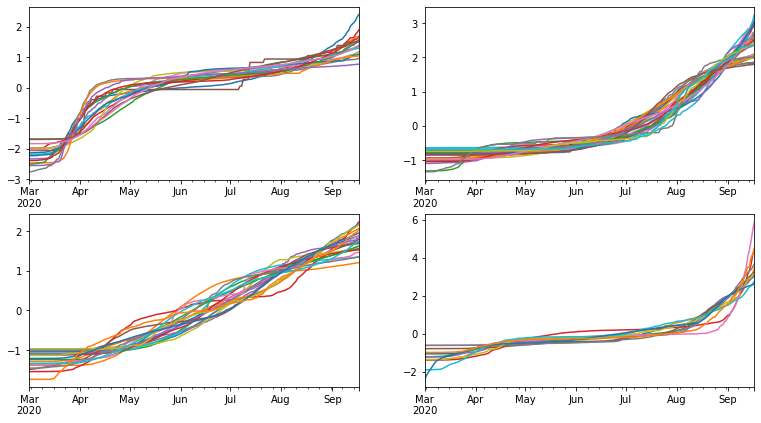

In [10]:
#Make a figure with the four clusters
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(13, 7)
df_kmeans_z_0.plot(legend='', ax=axes[0,0])
df_kmeans_z_1.plot(legend='', ax=axes[0,1])
df_kmeans_z_2.plot(legend='', ax=axes[1,0])
df_kmeans_z_3.plot(legend='', ax=axes[1,1])

### Cluster score

In [11]:
table = [["Method", "Score"],
        ["Silhouette score",round(silhouette_score(df_z.T, labels=labels_kmeans_z, metric='euclidean'),4)],
        ["Davies Bouldin score",round(davies_bouldin_score(df_z.T, labels=labels_kmeans_z),4)],
        ["Calinski Harabasz score",round(calinski_harabasz_score(df_z.T, labels=labels_kmeans_z),4)]]

display(HTML(tabulate.tabulate(table, tablefmt='html')))

Method,Score
Silhouette score,0.3502
Davies Bouldin score,0.9955
Calinski Harabasz score,65.9847


#### Exporting clustering results

In [12]:
#df_kmeans_z_0.to_parquet('../results/clustering_results/df_kmeans_z_0.parquet')
#df_kmeans_z_1.to_parquet('../results/clustering_results/df_kmeans_z_1.parquet')
#df_kmeans_z_2.to_parquet('../results/clustering_results/df_kmeans_z_2.parquet')
#df_kmeans_z_3.to_parquet('../results/clustering_results/df_kmeans_z_3.parquet')